## Dating Recommendations

In the digital age, online dating and flirting apps have become an important platform for individuals looking to form romantic relationships. These apps use various algorithms to match users with each other based on common interests, preferences, and demographic characteristics. Dating recommendation systems are designed to optimize this matching process.

The main purpose of dating recommendation systems is to provide users with the most suitable and potentially compatible matches. These systems analyze the information in users' profiles and aim to recommend profiles with the highest compatibility scores.

In this project, we will develop a content-based recommendation system.

Content-based recommendation systems are systems that provide recommendations based on users' past interactions and features in their profiles. Such systems analyze the features of the content users prefer and recommend new content with similar features.

Content-based recommendation systems work with the following steps:
* Data Collection: Data on the content that users interact with (e.g. products, movies, articles) is collected. This data is combined with users' profiles.
* Feature Extraction: Features of the content are determined. For example, features such as genre, actors, director for a movie; brand, category, price for a product.
* Creating a User Profile: A profile is created based on users' interests and past preferences. This profile includes common features of the content the user likes.
* Similarity Calculation: The features in the user's profile are compared with the features of existing content. This comparison is usually made using similarity measurements (e.g. cosine similarity).
* Recommendation Generation: Content with the highest degree of similarity is recommended to users.

Content-based recommender systems aim to enhance the user experience by providing customized recommendations based on users’ interests. In particular, they have the capacity to make effective recommendations by using users’ past interactions and content features.

<img src='dating.jpg' width=550 >

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df=pd.read_csv('dating_app_dataset.csv')
#Read the file.

## EDA - Exploratory Data Analysis

In [3]:
df.head()

,User ID,Age,Gender,Height,Interests,Looking For,Children,Education Level,Occupation,Swiping History,Frequency of Usage
0,1,30,Male,5.240385,"['Sports', 'Cooking', 'Hiking', 'Music', 'Movi...",Casual Dating,No,High School,Student,96,Weekly
1,2,27,Female,4.937625,"['Sports', 'Reading']",Friendship,Yes,Master's Degree,Artist,96,Monthly
2,3,29,Female,5.806296,['Sports'],Casual Dating,No,Bachelor's Degree,Social Media Influencer,64,Daily
3,4,29,Female,5.101402,['Reading'],Marriage,No,Ph.D.,Doctor,67,Daily
4,5,32,Male,5.986670,"['Sports', 'Hiking', 'Music', 'Movies', 'Readi...",Long-term Relationship,Yes,Ph.D.,Engineer,93,Monthly


In [4]:
df.shape

(500, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   User ID             500 non-null    int64  
 1   Age                 500 non-null    int64  
 2   Gender              500 non-null    object 
 3   Height              500 non-null    float64
 4   Interests           500 non-null    object 
 5   Looking For         500 non-null    object 
 6   Children            500 non-null    object 
 7   Education Level     500 non-null    object 
 8   Occupation          500 non-null    object 
 9   Swiping History     500 non-null    int64  
 10  Frequency of Usage  500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


In [6]:
df.isnull().sum()

User ID               0
Age                   0
Gender                0
Height                0
Interests             0
Looking For           0
Children              0
Education Level       0
Occupation            0
Swiping History       0
Frequency of Usage    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df['Height']

0      5.240385
1      4.937625
2      5.806296
3      5.101402
4      5.986670
         ...   
495    5.316685
496    5.070365
497    4.871727
498    5.647436
499    5.651541
Name: Height, Length: 500, dtype: float64

In [9]:
df['Height'] = (df['Height'] * 0.3048 *100).astype(int) / 100
#df['Height'] = df['Height'].round(2) or we can round the numbers.I want it in centimeters(cm).

In [10]:
df.head()

,User ID,Age,Gender,Height,Interests,Looking For,Children,Education Level,Occupation,Swiping History,Frequency of Usage
0,1,30,Male,1.59,"['Sports', 'Cooking', 'Hiking', 'Music', 'Movi...",Casual Dating,No,High School,Student,96,Weekly
1,2,27,Female,1.50,"['Sports', 'Reading']",Friendship,Yes,Master's Degree,Artist,96,Monthly
2,3,29,Female,1.76,['Sports'],Casual Dating,No,Bachelor's Degree,Social Media Influencer,64,Daily
3,4,29,Female,1.55,['Reading'],Marriage,No,Ph.D.,Doctor,67,Daily
4,5,32,Male,1.82,"['Sports', 'Hiking', 'Music', 'Movies', 'Readi...",Long-term Relationship,Yes,Ph.D.,Engineer,93,Monthly


## Data Visualization

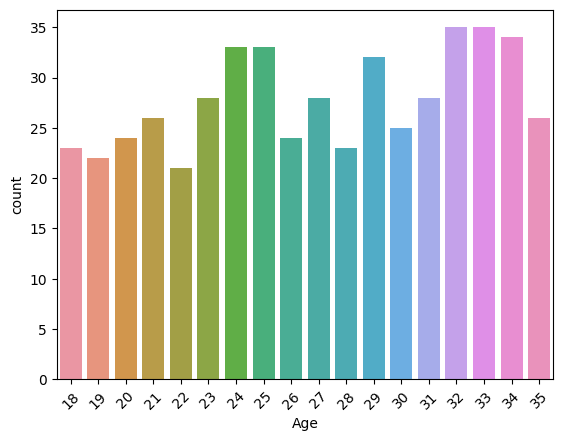

In [11]:
sns.countplot(x=df['Age'])
plt.xticks(rotation=45);

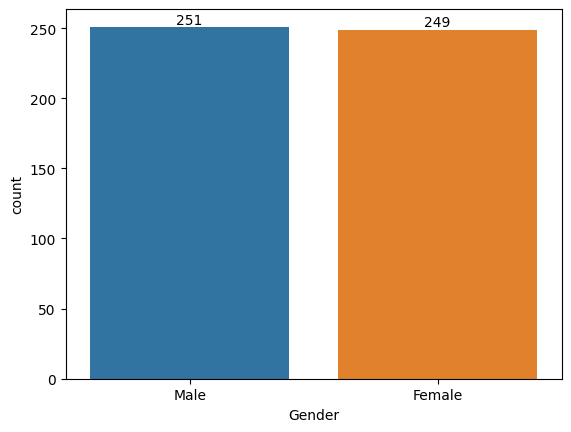

In [12]:
ax=sns.countplot(x=df['Gender'])
ax.bar_label(ax.containers[0]);

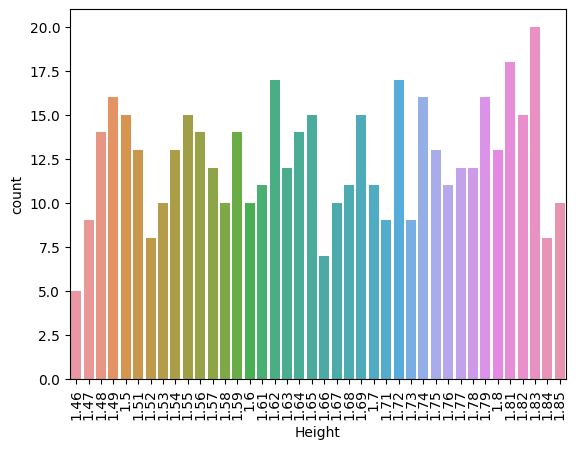

In [13]:
sns.countplot(x=df['Height'])
plt.xticks(rotation=90);

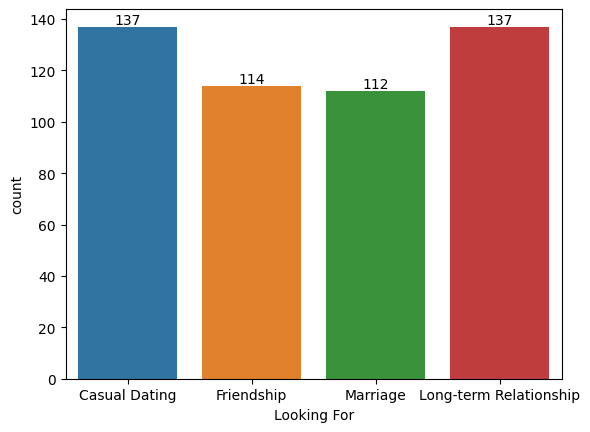

In [14]:
ax=sns.countplot(x=df['Looking For'])
ax.bar_label(ax.containers[0]);

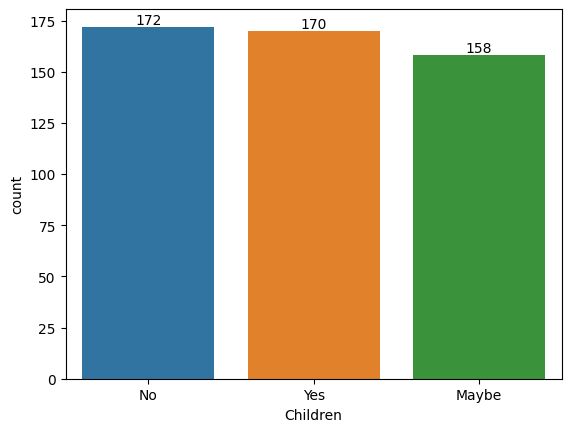

In [15]:
ax=sns.countplot(x=df['Children'])
ax.bar_label(ax.containers[0]);

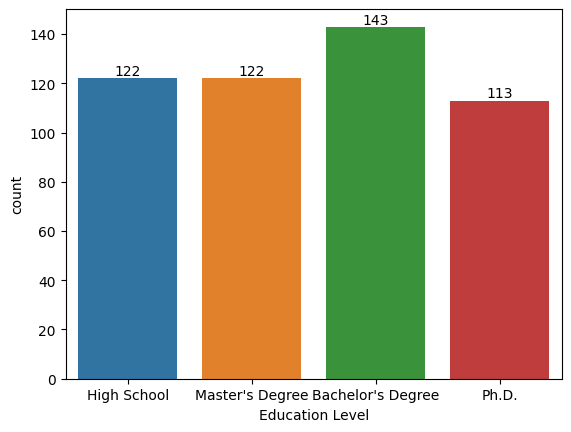

In [16]:
ax=sns.countplot(x=df['Education Level'])
ax.bar_label(ax.containers[0]);

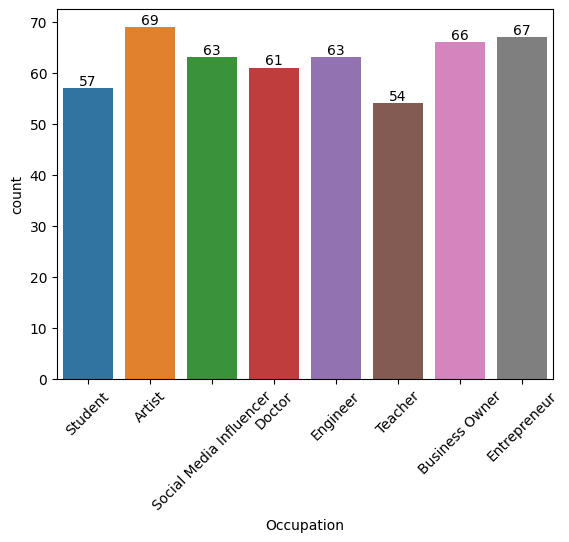

In [17]:
ax=sns.countplot(x=df['Occupation'])
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0]);

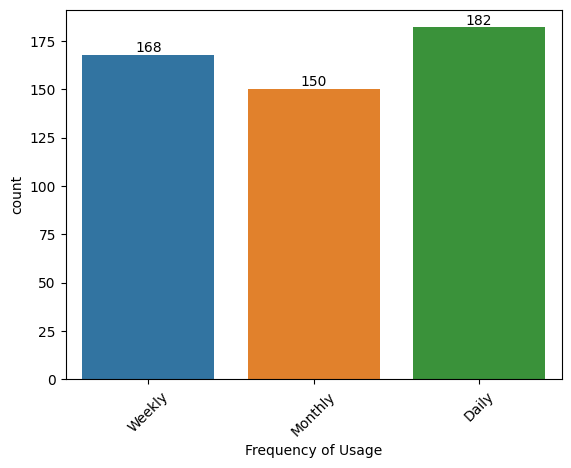

In [18]:
ax=sns.countplot(x=df['Frequency of Usage'])
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0]);

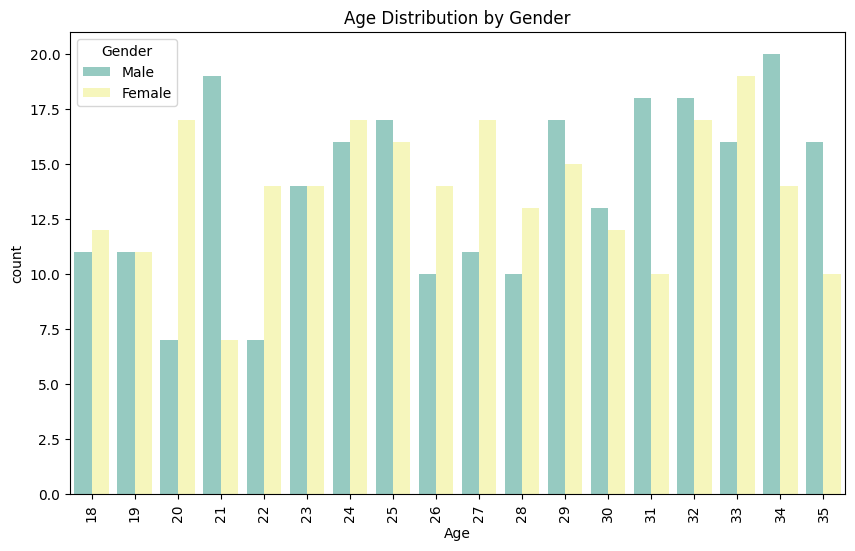

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['Age'],hue=df.Gender, palette='Set3')
plt.title('Age Distribution by Gender')
plt.xticks(rotation=90);

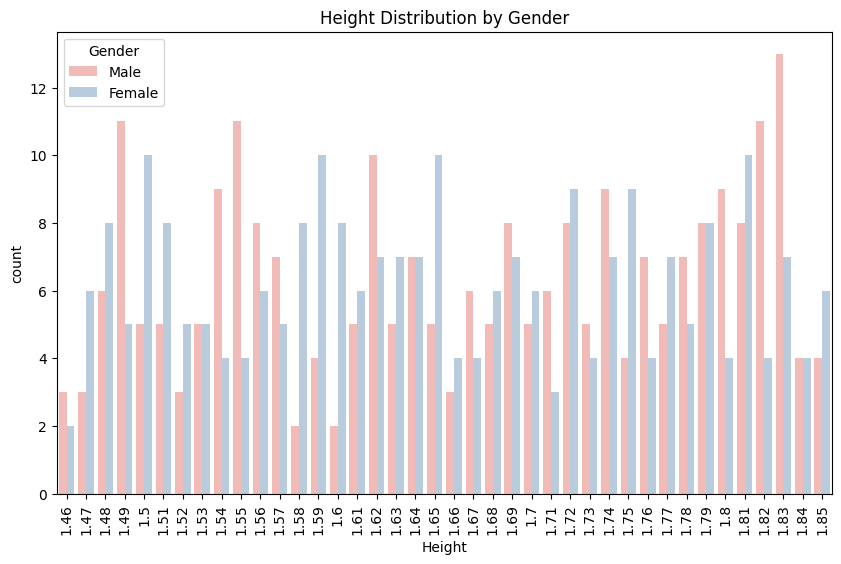

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['Height'],hue=df.Gender, palette='Pastel1')
plt.title('Height Distribution by Gender')
plt.xticks(rotation=90);

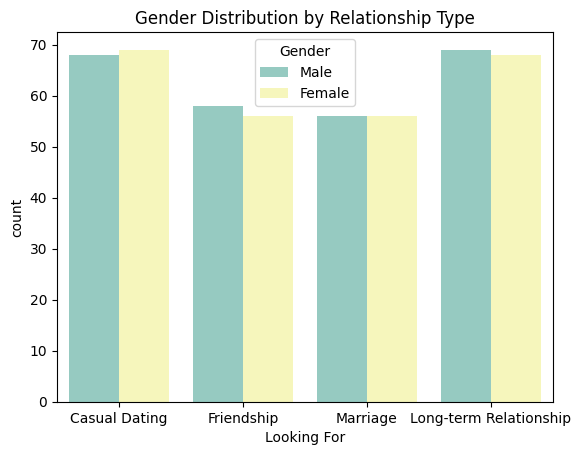

In [21]:
sns.countplot(x=df['Looking For'],hue=df.Gender, palette='Set3')
plt.title('Gender Distribution by Relationship Type');

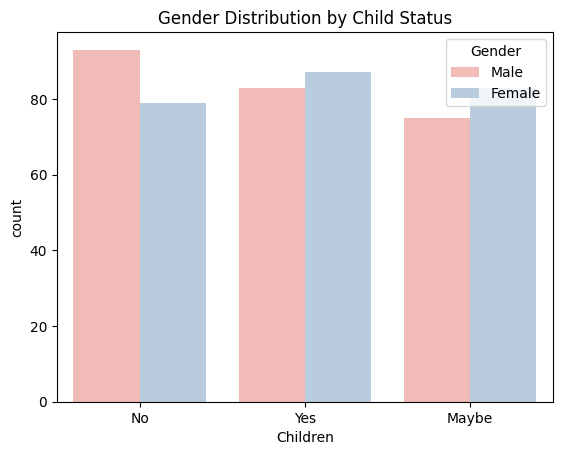

In [22]:
sns.countplot(x=df['Children'],hue=df.Gender, palette='Pastel1')
plt.title('Gender Distribution by Child Status');

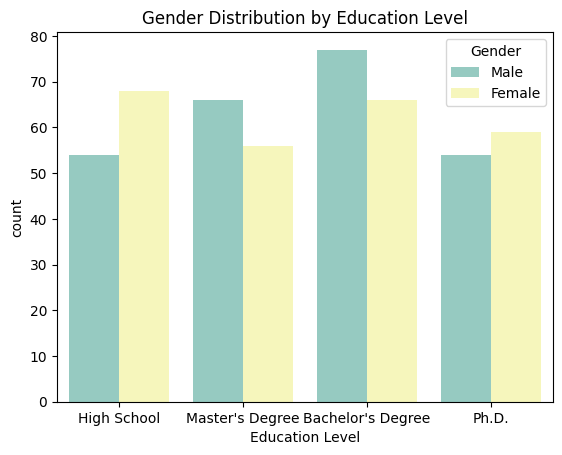

In [23]:
sns.countplot(x=df['Education Level'],hue=df.Gender, palette='Set3')
plt.title('Gender Distribution by Education Level');

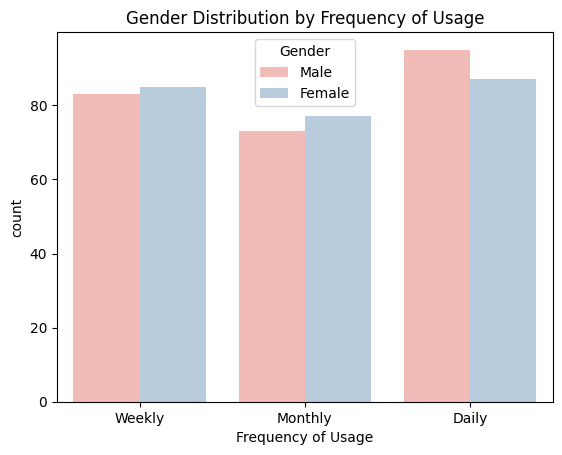

In [24]:
sns.countplot(x=df['Frequency of Usage'],hue=df.Gender, palette='Pastel1')
plt.title('Gender Distribution by Frequency of Usage');

In [25]:
male_profiles = df[df['Gender'] == 'Male']
female_profiles = df[df['Gender'] == 'Female']

In [26]:
def calculate_match_score(profile1, profile2):
    # Shared interests score (1 point per shared interest)
    interests1 = set(eval(profile1['Interests']))
    interests2 = set(eval(profile2['Interests']))
    shared_interests_score = len(interests1.intersection(interests2))

    # Age difference score (higher age difference, lower score)
    age_difference_score = max(0, 10 - abs(profile1['Age'] - profile2['Age']))

    # Swiping history score (higher swiping history, higher score)
    swiping_history_score = min(profile1['Swiping History'], profile2['Swiping History']) / 100

    # Relationship type score (1 point for matching types)
    relationship_type_score = 0
    if profile1['Looking For'] == profile2['Looking For']:
        relationship_type_score = 1

    # Total match score
    total_score = (
        shared_interests_score + age_difference_score + swiping_history_score + relationship_type_score
    )

    return total_score

In [29]:
profile1 = male_profiles.iloc[1]
profile2 = female_profiles.iloc[3]
match_score = calculate_match_score(profile1, profile2)
print(f"Match score between User {profile1 ['User ID'] } and User {profile2 ['User ID'] } : {match_score}")

Match score between User 5 and User 6 : 8.38


(To calculate the match score between two user profiles)

* Shared Interests Score:Interests columns are treated as an array containing users' interests.Using set.intersection(), the common interests of two profiles are counted and the score is calculated based on this number.

* Age Difference Score:The age difference is calculated as the absolute difference between the ages of the two profiles. The smaller the difference, the higher the score. The maximum score is 10.

* Scrolling History Score:Users' scrolling history is divided by 100, taking the minimum of the scrolling history of both profiles. This gives users with more scrolling history a higher score.

* Relationship Type Score:If the relationship types that the users are looking for match (for example, both are looking for a "serious relationship"), they are given a score of 1.

* Total Match Score:All the scores are added together to calculate the total match score.

In [30]:
def recommend_profiles(male_profiles, female_profiles):
    recommendations = []

    for _, male_profile in male_profiles.iterrows():
        best_match = None
        best_score = -1

        for _, female_profile in female_profiles.iterrows():
            score = calculate_match_score(male_profile, female_profile)

            if score > best_score:
                best_match = female_profile
                best_score = score

        recommendations.append((male_profile, best_match, best_score))

    return recommendations

# Generate recommendations
recommendations = recommend_profiles(male_profiles, female_profiles)

# Sort recommendations by match score in descending order
recommendations.sort(key=lambda x: x[2], reverse=True)

# Display the top recommendations
for idx, (male_profile, female_profile, match_score) in enumerate(recommendations[:5]):
    print(f"Recommendation {idx + 1}:")
    print(f"Male Profile (User {male_profile['User ID']}): Age {male_profile['Age']}, Interests {male_profile['Interests']}")
    print(f"Female Profile (User {female_profile['User ID']}): Age {female_profile['Age']}, Interests {female_profile['Interests']}")
    print(f"Match Score: {match_score}")
    print()

Recommendation 1:
Male Profile (User 36): Age 19, Interests ['Movies', 'Cooking', 'Hiking', 'Reading', 'Sports', 'Travel', 'Music']
Female Profile (User 451): Age 19, Interests ['Reading', 'Music', 'Cooking', 'Hiking', 'Travel', 'Sports', 'Movies']
Match Score: 18.79

Recommendation 2:
Male Profile (User 274): Age 29, Interests ['Reading', 'Movies', 'Travel', 'Music', 'Hiking', 'Cooking', 'Sports']
Female Profile (User 300): Age 29, Interests ['Cooking', 'Reading', 'Music', 'Hiking', 'Travel', 'Sports', 'Movies']
Match Score: 18.73

Recommendation 3:
Male Profile (User 456): Age 29, Interests ['Cooking', 'Hiking', 'Sports', 'Travel', 'Music', 'Movies', 'Reading']
Female Profile (User 65): Age 29, Interests ['Travel', 'Movies', 'Reading', 'Sports', 'Music', 'Cooking', 'Hiking']
Match Score: 18.69

Recommendation 4:
Male Profile (User 147): Age 34, Interests ['Reading', 'Travel', 'Movies', 'Hiking', 'Cooking', 'Music', 'Sports']
Female Profile (User 287): Age 34, Interests ['Reading', 'H

Our code above defines a recommendation system to match male profiles with female profiles based on the calculated match score. It works by iterating over all possible matches of male and female profiles and finding the best match for each male profile.

* recommend_profiles(): Scans each male profile and finds the female profile with the highest match score for each.
The female profiles are then ranked for each male using the match score. The result is a list containing the male profile, the best match female profile, and the match score.

* Sorting and Displaying: Once the suggestions are generated, they are sorted in descending order by match score. The top 5 suggestions are printed along with details such as age, interests, match score, etc.



## Summary

In this project, we developed a recommendation system that can match between male and female profiles. We analyzed components such as profile data, matching algorithms, matching score, common interests, demographic characteristics, relationship type, past interactions. The sum of these components gives the total match score between both profiles. The recommendation system works on male and female profiles, finds the female profile with the highest score for each male profile and ranks the best matches. The obtained matches are ranked in descending order according to their scores and recommendations are created. Thus, we have developed a content-based recommendation system.